<a href="https://colab.research.google.com/github/SamuelWanjiru/Recommender_System_Amazon_Reviews/blob/main/RecommenderSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<font color='red'> <u>Recommender System :</font> <font color='blue'>Amazon Reviews</u>**

E-commerce companies like AMazon , Walmart and eBay uses different recommendation systems to provide suggestions to the customers.Amazon uses currently item-item collaberrative filtering, which scales to massive datasets and produces high quality recommendation system in the real time. This system is a kind of a information filtering system which seeks to predict the "rating" or preferences which user is interested in.

**What are recommendation systems?**

* A recommender system, is a subclass of information filtering system that provide suggestions for items that are most pertinent to a particular user [info](https://en.wikipedia.org/wiki/Recommender_system#:~:text=A%20recommender%20system%2C%20or%20a,pertinent%20to%20a%20particular%20user.).
Recommeder system creates a similarity between the user and items and exploits the similarity between user/item to make recommendations.

* In this modern world we are overloaded with data and this data provides us the useful information. But it's not possible for the user to extract the information which interest them from these data. In order to help the user to find out information about the product , recommedation systems where developed.


## **Connecting/mounting the google drive**

In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### **Importing the relevant data analysis libraries**

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import math
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
import joblib
import scipy.sparse
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

### **Loading the dataset**

In [3]:
electronics = pd.read_csv(r'/content/gdrive/My Drive/KAGGLE PROJECTS/RECOMMENDER SYSTEM/ratings_Electronics.csv')

### **Understanding the data**

1. Displaying the 1st 5 observations/entries

In [4]:
electronics.head()

,AKM1MP6P0OYPR,0132793040,5.0,1365811200
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


From the dataset, the column headers are not clear and understandle. Lets therefore add the column headers.

In [5]:
# Define column names
names= ['userId', 'productId','Rating','timestamp']

# Adding column names to the dataset

electronics.columns = names

Displaying the dataset now:

In [6]:
electronics.head()

,userId,productId,Rating,timestamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


**Variable information**
The above added variables/ column names, hold the following information
* userId : Every user identified with a unique id.
* productId : Every product identified with a unique id.
* Rating : Rating of the corresponding product by the corresponding user.
* timestamp : Time of the rating.

**Checking the shape of the dataset**

In [7]:
print("The electronics dataset has", electronics.shape[0],"rows/entries and",electronics.shape[1],"columns")

The electronics dataset has 7824481 rows/entries and 4 columns


**Checking the data types**

In [8]:
electronics.dtypes

userId        object
productId     object
Rating       float64
timestamp      int64
dtype: object

**Checking the data information**

In [9]:
electronics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824481 entries, 0 to 7824480
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     object 
 1   productId  object 
 2   Rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


**Descriptive statistics (Rating column)**

In [10]:
electronics.describe()['Rating']

count    7.824481e+06
mean     4.012337e+00
std      1.380910e+00
min      1.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: Rating, dtype: float64

From the above summary, the **minimum rating** is seen to be **1** and the **maximum rating** is **5**. 
The **mean** rating is **4.01** and the **standard deviation** of the ratings is **1.38**.

## **Data Cleaning**

Handling missing values

In [11]:
electronics.isnull().sum()

userId       0
productId    0
Rating       0
timestamp    0
dtype: int64

The data has no missing values.

Dropping the timestamp column 

In [12]:
electronics.drop(['timestamp'],axis=1,inplace=True)

In [13]:
electronics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824481 entries, 0 to 7824480
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     object 
 1   productId  object 
 2   Rating     float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


## **Investigating the data**
**1. Ratings**


Checking the distribution of the rating column

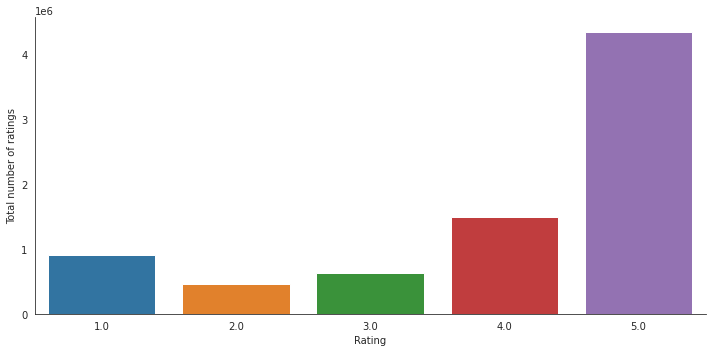

In [14]:
with sns.axes_style('white'):
    g = sns.factorplot("Rating", data=electronics, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")

plt.show();

**Findings**

Most of the electronics shoppers on Amazon have given a rating of 5.

Finding the unique users and products

In [15]:
print("Total data ")
print("-"*50)
print("\nTotal no of ratings :",electronics.shape[0])
print("Total No of Users   :", len(np.unique(electronics.userId)))
print("Total No of products  :", len(np.unique(electronics.productId)))

Total data 
--------------------------------------------------

Total no of ratings : 7824481
Total No of Users   : 4201696
Total No of products  : 476001


Analysis of rating given by the user 

In [16]:
no_of_rated_products_per_user = electronics.groupby(by='userId')['Rating'].count().sort_values(ascending=False)

no_of_rated_products_per_user.head()

userId
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
Name: Rating, dtype: int64

Finding the maximum and minimum ratings per customer

In [17]:
print("The maximum number of ratings given by a cutomer is", no_of_rated_products_per_user.max(),"and the minimum is", no_of_rated_products_per_user.min())

The maximum number of ratings given by a cutomer is 520 and the minimum is 1


**Creating quartiles**

In [18]:
quantiles = no_of_rated_products_per_user.quantile(np.arange(0,1.01,0.01), interpolation='higher')

Plotting the quartiles

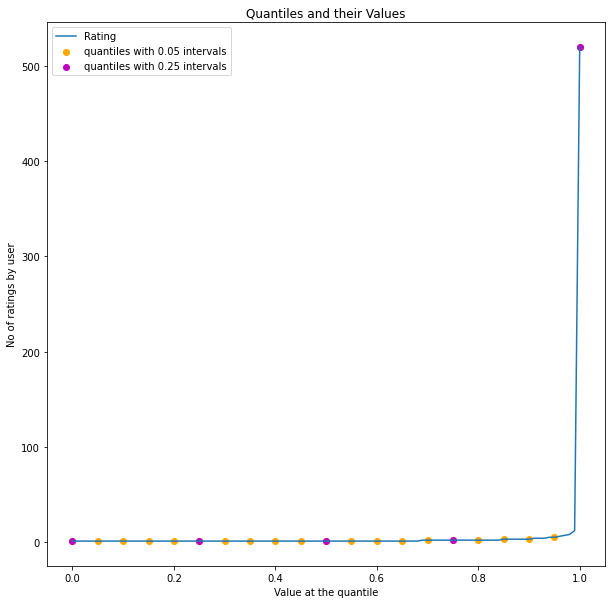

In [19]:
plt.figure(figsize=(10,10))
plt.title("Quantiles and their Values")
quantiles.plot()
# quantiles with 0.05 difference
plt.scatter(x=quantiles.index[::5], y=quantiles.values[::5], c='orange', label="quantiles with 0.05 intervals")
# quantiles with 0.25 difference
plt.scatter(x=quantiles.index[::25], y=quantiles.values[::25], c='m', label = "quantiles with 0.25 intervals")
plt.ylabel('No of ratings by user')
plt.xlabel('Value at the quantile')
plt.legend(loc='best')
plt.show();